In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
#KMeans clustering Algorithm
from sklearn.cluster import KMeans


In [5]:
df =pd.read_csv("C:\\Users\\Avila\\OneDrive\\Desktop\\csv files\\Bank-Customers.csv")
df.head()

,Cust_id,Age,Earning,Credit Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [6]:
df.describe()

,Cust_id,Age,Earning,Credit Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Earning', ylabel='Credit Score'>

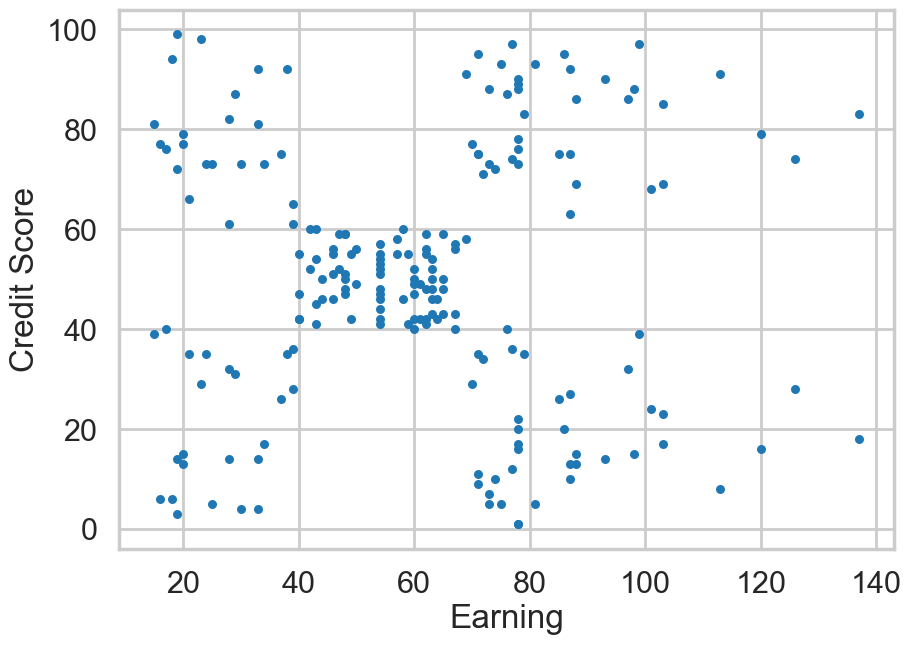

In [7]:
df.plot(x='Earning', y='Credit Score',kind='scatter', figsize=(10,7))

In [8]:
#Instantiate the Algorithm
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=1)

#Fit to the data
kmeans.fit(df)

KMeans(max_iter=1000, n_clusters=5, random_state=1)

In [9]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 4, 4, 4, 4, 3, 3, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [10]:
#Output of K-Means is the cluster label
k5_labels = kmeans.labels_

#Attach labels to the original DataFrame
df_k5 = df.copy()
df_k5['Label'] = k5_labels
df_k5.head()

,Cust_id,Age,Earning,Credit Score,Label
0,1,19,15,39,4
1,2,21,15,81,3
2,3,20,16,6,4
3,4,23,16,77,3
4,5,31,17,40,4


In [11]:
df_k5.Label.value_counts()

1    68
2    39
0    38
4    30
3    25
Name: Label, dtype: int64

In [12]:
df_k5[(df_k5.Label == 1)].describe()

,Cust_id,Age,Earning,Credit Score,Label
count,68.000000,68.000000,68.000000,68.000000,68.0
mean,89.470588,43.911765,56.588235,50.044118,1.0
std,19.825711,17.238221,7.109454,5.910865,0.0
min,54.000000,18.000000,43.000000,40.000000,1.0
25%,72.750000,26.750000,49.750000,46.000000,1.0
50%,89.500000,47.500000,58.000000,50.000000,1.0
75%,106.250000,59.000000,62.250000,55.000000,1.0
max,123.000000,70.000000,69.000000,60.000000,1.0


In [13]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(df_k5, index = ['Label'], values = ['Earning','Credit Score'], 
               aggfunc=[np.mean,np.min, np.max])

mean                    amin                 amax        
      Credit Score    Earning Credit Score Earning Credit Score Earning
Label                                                                  
0        18.631579  87.000000            1      70           40     137
1        50.044118  56.588235           40      43           60      69
2        82.128205  86.538462           63      69           97     137
3        76.840000  27.600000           54      15           99      43
4        26.833333  29.766667            3      15           55      43

<AxesSubplot:xlabel='Earning', ylabel='Credit Score'>

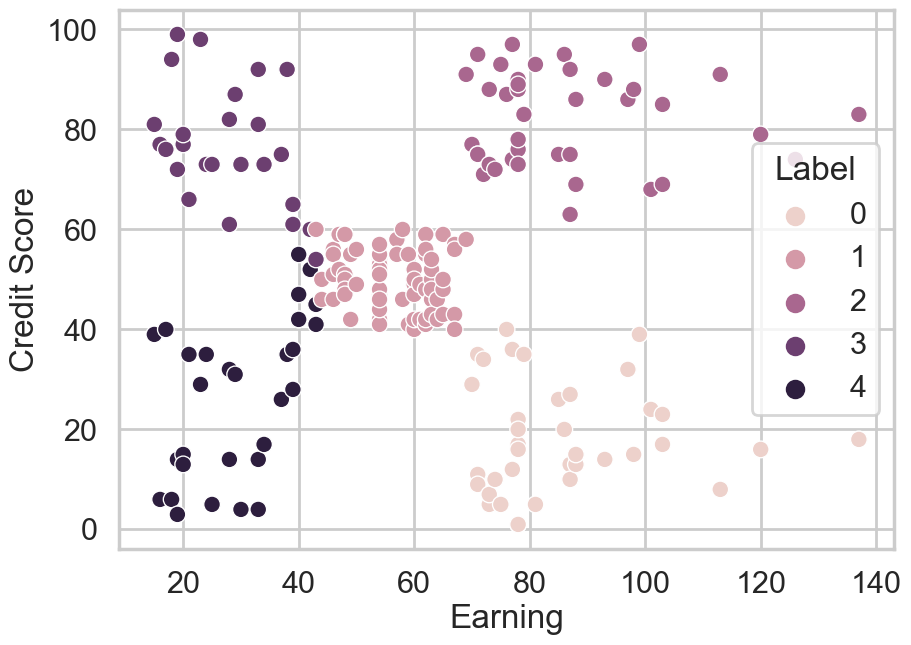

In [14]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot(ax = ax, x=df_k5.Earning, y=df_k5['Credit Score'], hue=df_k5.Label)

<AxesSubplot:xlabel='Earning', ylabel='Credit Score'>

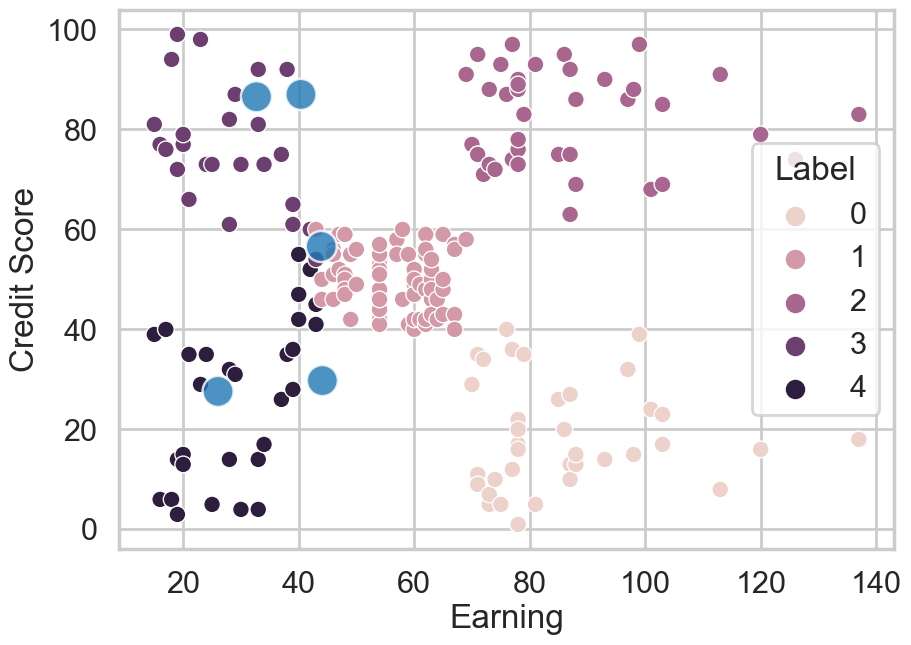

In [15]:
#Visualize the Cluster Centers
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_k5.Earning, y=df_k5['Credit Score'], hue=df_k5.Label)

centers = kmeans.cluster_centers_
sns.scatterplot(x=centers[:,1], y=centers[:,2], s=500, alpha=0.8, marker='o', hue=[0,0,0,0,0], legend=False)

# Selecting K
### Elbow Method
#### Steps:
<ul>
    <li>Run k-means clustering on the dataset for a range of values of k (i.e. k from 2 to 10)</li>
<li>For each value of k calculate the sum of squared errors (SSE)</li>
<li>Plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.</li>
   </ul>
The SSE can be retreived by accessing the "inertia_" attribute of the KMeans algorithm

In [16]:
#Set range for k
range_n_clusters= [2,3,4,5,6,7,8,9,10]

#Set an empty list to store the SSE values for each cluster
scores = []

# Iterate over cluster size options
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=1) 
    
    #Fit to the right Dataframe
    kmeans.fit(df)
    
    #Get the SSE
    score = kmeans.inertia_
    
    #Append to the empty list created earlier
    scores.append(score)
    
    #Print for visibility
    print(str(i) +"\t" +str(score))

2	387016.6872687269
3	271347.4759700926
4	195344.71752136754
5	157457.1233603239
6	122579.38048552755
7	103160.40079365078
8	85977.96504884005
9	77019.03610700762
10	69659.30334277473


Text(0, 0.5, 'Score')

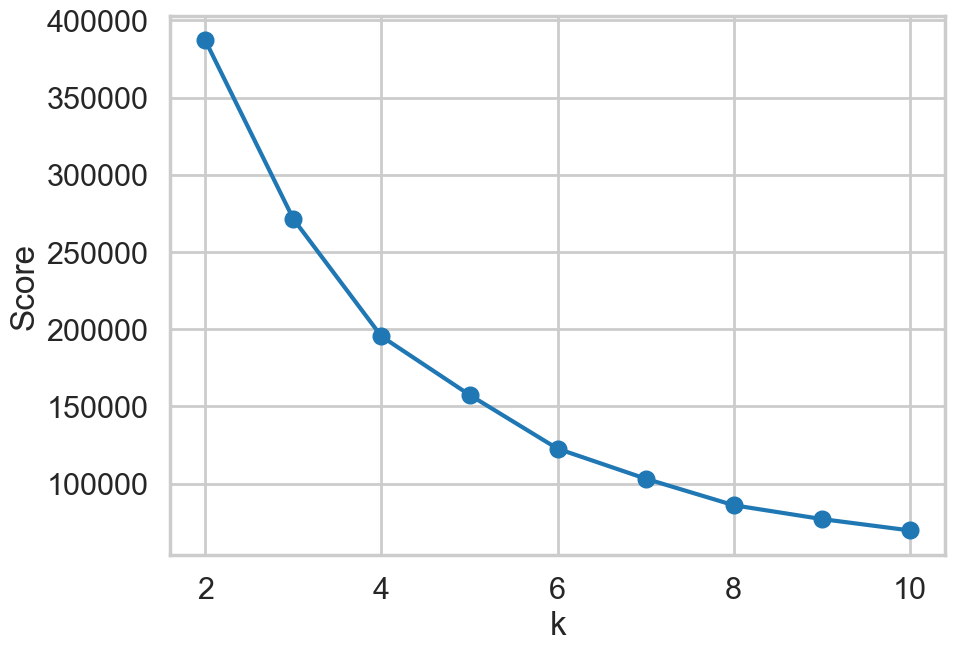

In [17]:
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range_n_clusters, np.abs(scores), marker='o')
plt.xlabel("k")
plt.ylabel("Score")

## Silhouette Method
<br>A way to measure how close each point in a cluster is to the points in its neighboring clusters.
Values lies in the range of [-1, 1]
<ul>
<li>+1: indicates that the sample is far away from its neighboring cluster and very close to the cluster its assigned</li>
<li>-1: indicates that the point is close to its neighboring cluster than to the cluster its assigned.</li>
<li>0: means its at the boundary of the distance between the two cluster.</li>
 </ul>
The higher the value better is the cluster configuration.

In [18]:
#Import the Silhouette Functions from sklearn and colormap from matplotlib
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [19]:
#Example for k=5 

kmeans = KMeans(n_clusters=6, random_state=1) 
kmeans.fit(df)

sil_score_k5 = silhouette_score(df, kmeans.labels_)

print("Silhouette Score for k=5: %.2f" % sil_score_k5)

Silhouette Score for k=5: 0.41


In [20]:
#Example for range of "k"

#Set range for k
range_n_clusters= [2,3,4,5,6,7,8,9,10]

# Iterate over cluster size options
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=1)
    
    #Fit to the correct dataframe
    kmeans.fit(df)
    
    #Get the Silhouette Score
    sil_score = silhouette_score(df,kmeans.labels_)
    
    #Print the  Silhouette Scores
    print("%s \t %.2f" % (i, sil_score))

2 	 0.48
3 	 0.38
4 	 0.42
5 	 0.43
6 	 0.41
7 	 0.41
8 	 0.40
9 	 0.39
10 	 0.39
